In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
%matplotlib notebook


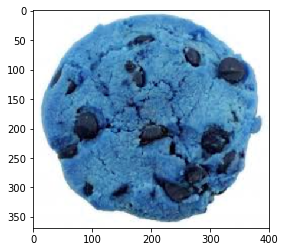

In [12]:
img = cv2.imread('./../cookie_001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])

<IPython.core.display.Javascript object>


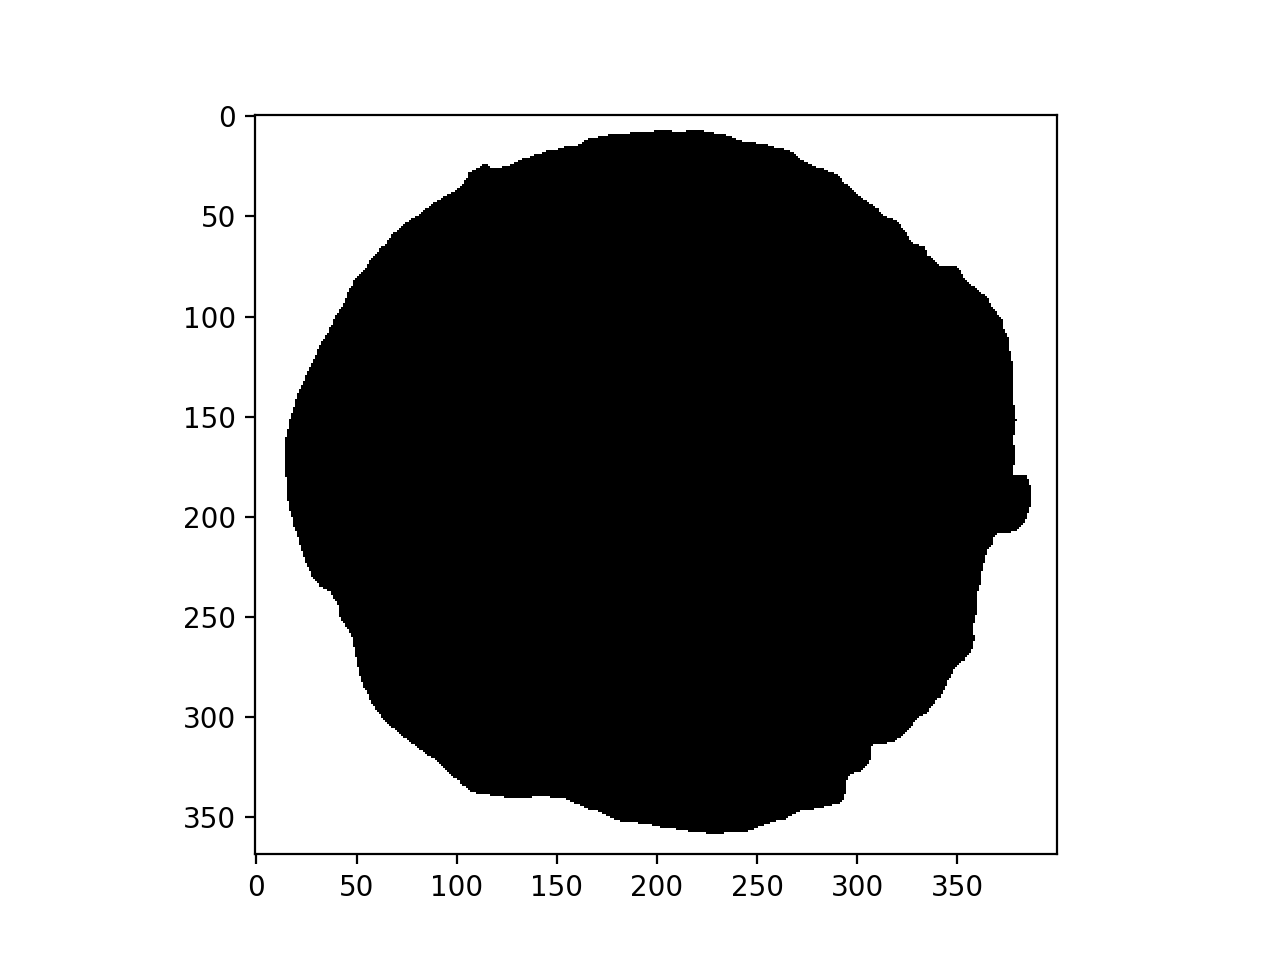

In [184]:
kernel = np.ones((5,5),np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,100,200)
# _, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
blur = cv2.GaussianBlur(gray,(5,5),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
new_edges = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)
# print(hierarchy)
plt.imshow(new_edges,cmap='gray')

<IPython.core.display.Javascript object>


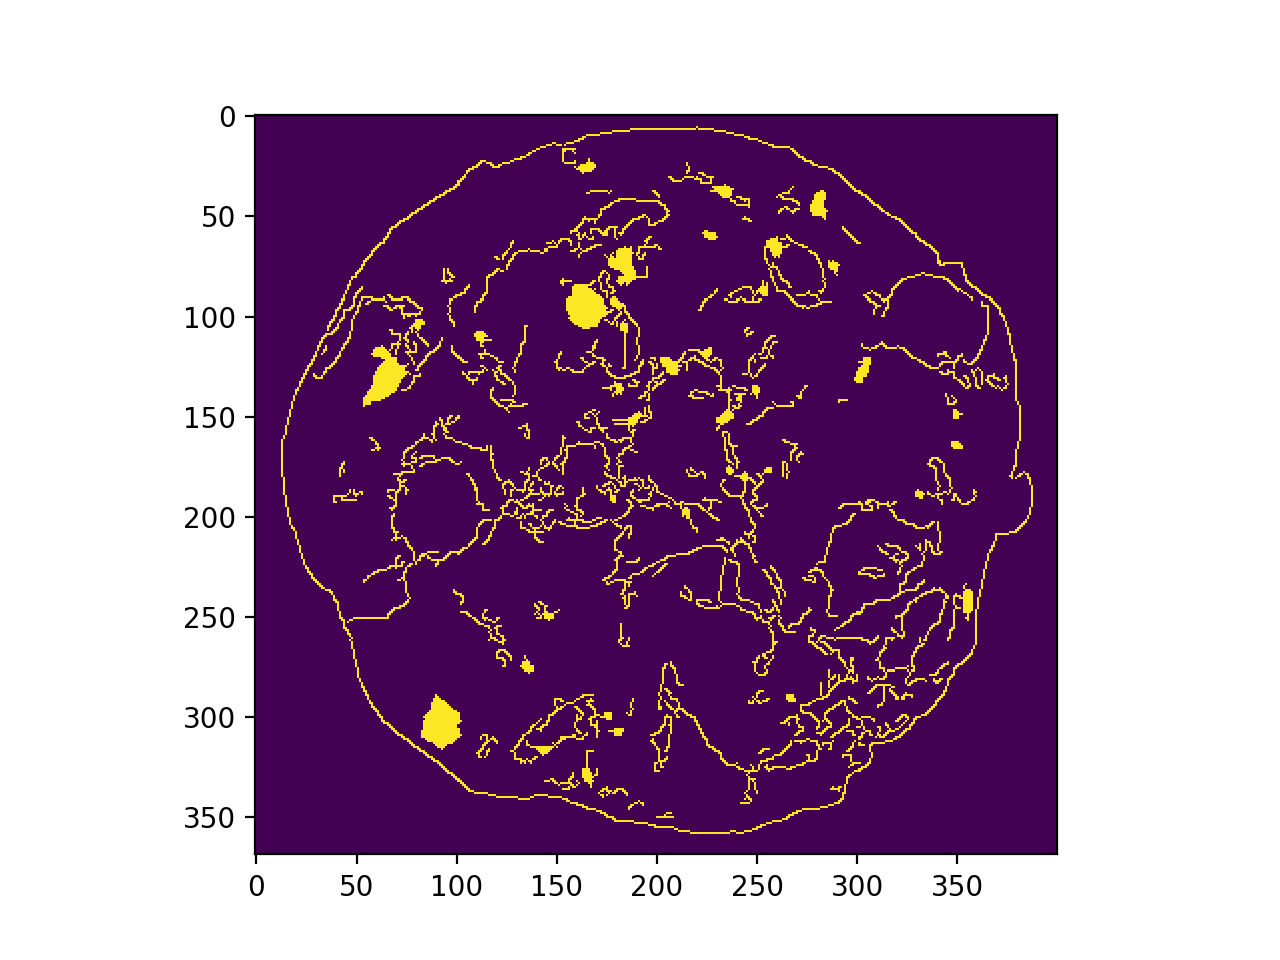

In [79]:
# kernel = np.ones((1,1),np.uint8)
# new_edges = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel)
# plt.imshow(new_edges)
# _, new_contours, hierarchy = cv2.findContours(new_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

# mask = np.zeros_like(edges)
# for cnt in contours:
#     cv2.drawContours(mask, np.asarray([cnt]), -1, 255, cv2.FILLED)
# plt.imshow(mask)

<IPython.core.display.Javascript object>


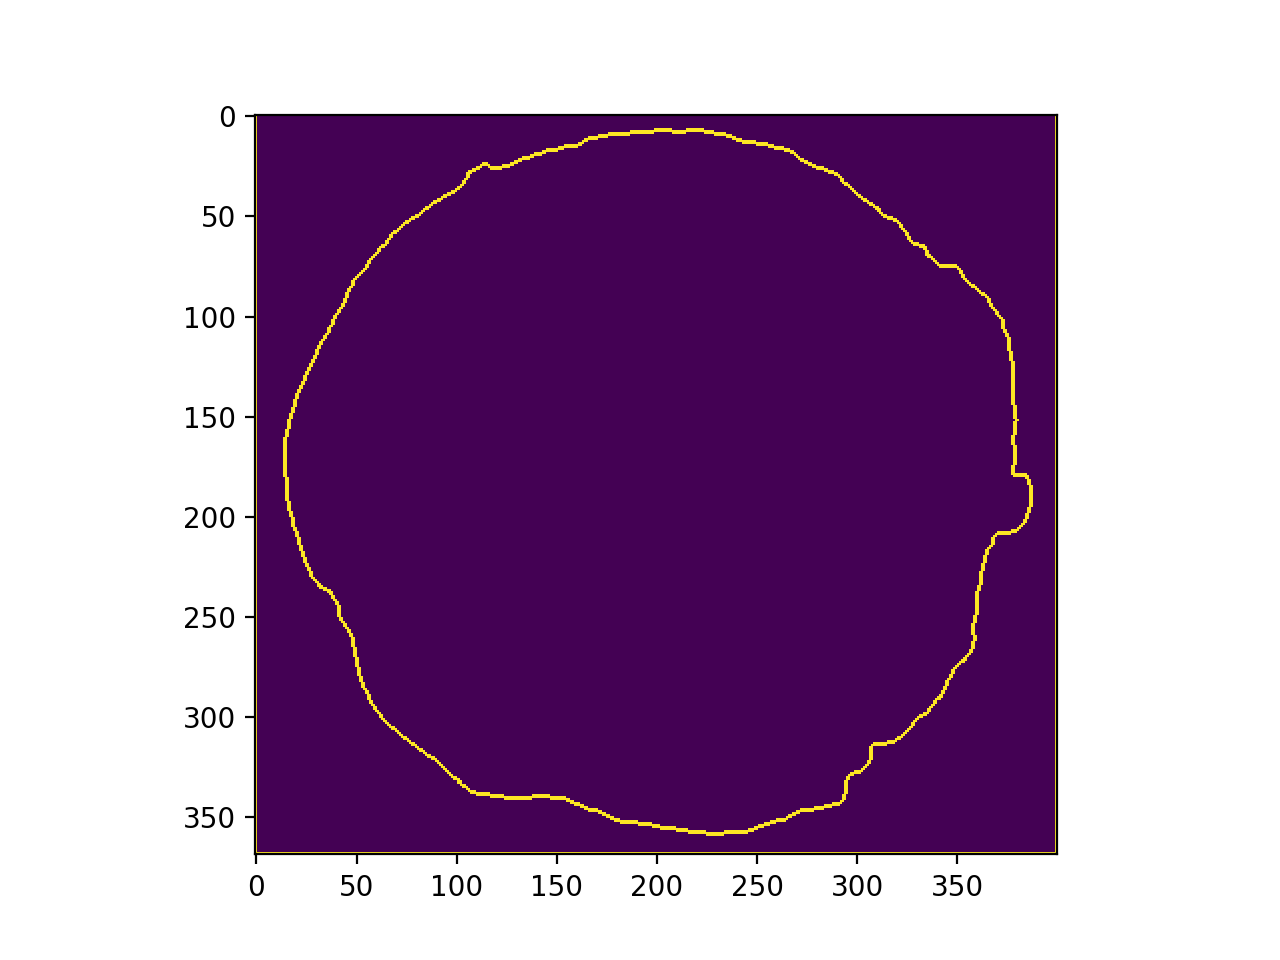

In [185]:
new_edges = np.invert(new_edges)
_,final_contour, hierarchy = cv2.findContours(new_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(mask1, final_contour, -1, 255, 1)
plt.imshow(mask1)

<IPython.core.display.Javascript object>


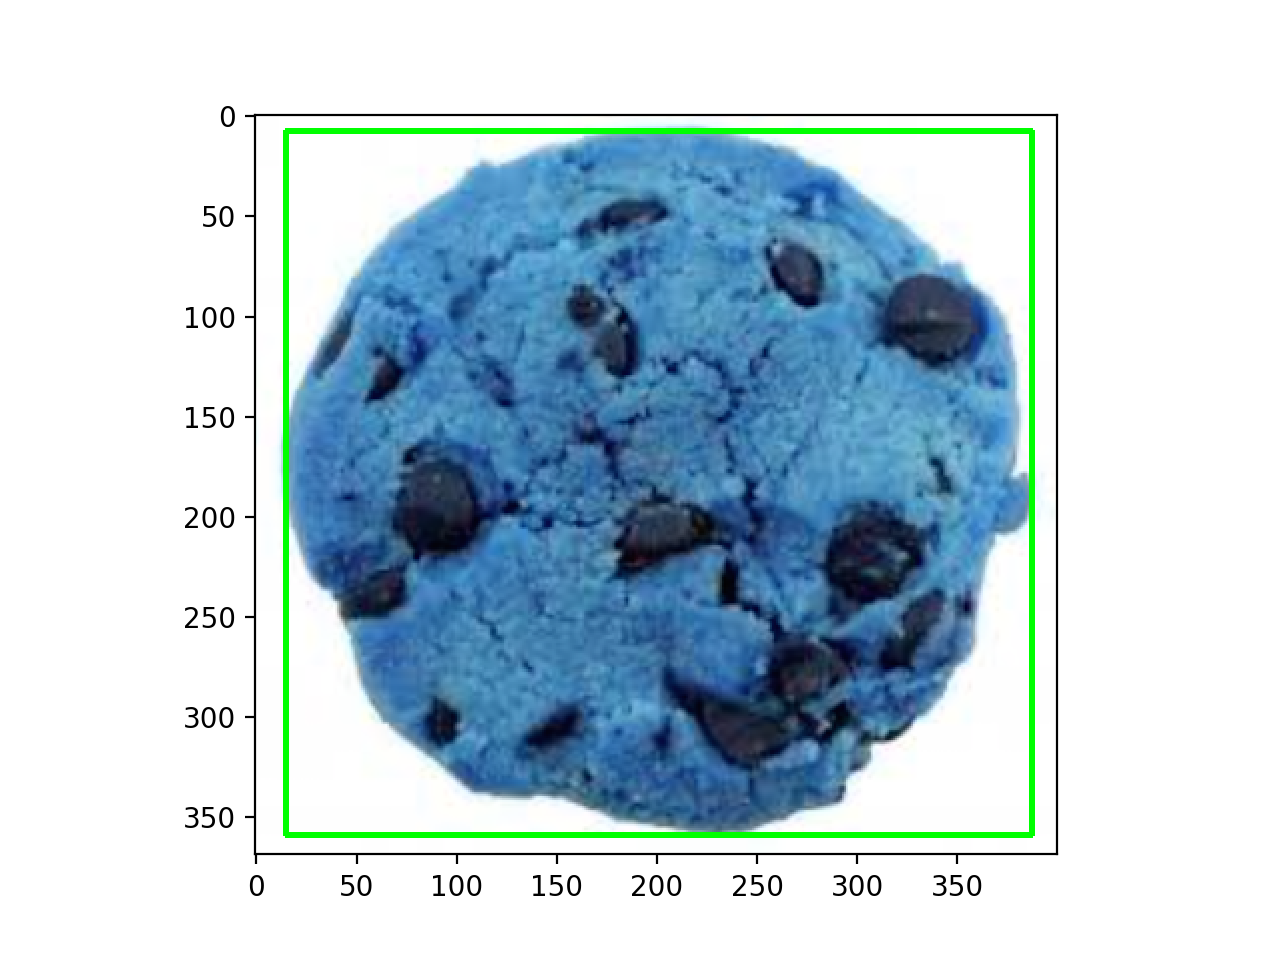

In [186]:
x,y,w,h = cv2.boundingRect(final_contour[-1])
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [190]:
(x,y),radius = cv2.minEnclosingCircle(final_contour[-1])
print(radius)
print(int(x),int(y))
# print(final_contour[-1])
for cnt in final_contour[-1]:
    print(cnt[0][0])

187.1505889892578
201 178
199
198
187
186
176
175
171
170
166
165
164
162
161
160
154
153
151
150
145
144
143
142
139
138
137
136
133
132
131
130
129
128
127
126
123
122
117
115
113
111
110
109
108
107
106
106
104
104
99
98
97
96
95
94
92
91
90
89
86
85
81
80
79
78
76
75
70
69
68
68
66
66
64
63
62
62
57
57
56
56
49
49
47
47
46
46
45
45
44
44
42
42
40
40
39
39
37
37
35
35
33
33
32
32
31
31
30
30
29
29
28
28
27
27
26
26
25
25
24
24
23
23
22
22
21
21
20
20
19
19
18
18
17
17
16
16
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
32
32
33
34
35
36
37
38
38
39
39
41
41
42
42
43
43
45
45
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
56
56
57
57
58
58
60
60
63
63
68
69
74
75
78
79
82
83
86
87
88
89
99
100
102
102
103
104
107
109
110
116
117
123
124
137
138
146
147
154
155
156
157
158
159
161
162
163
164
165
166
170
171
172
173
174
175
176
177
178
179
181
182
190
191
197
198
201
202
209
210
215
216
224
225
233
234
245
246
248
249
250
251
253
254
256
257
259


<IPython.core.display.Javascript object>


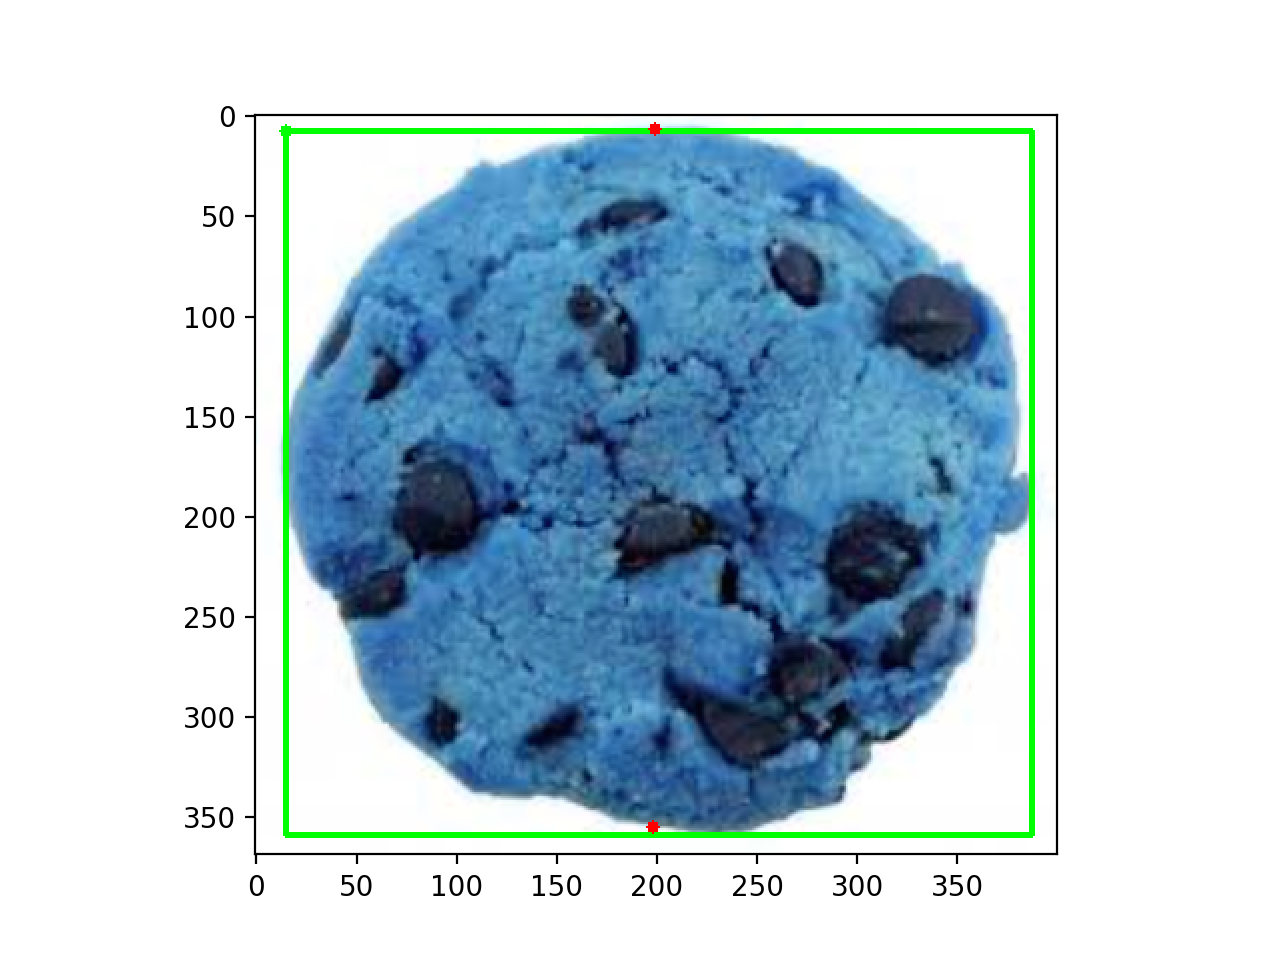

In [188]:
cv2.circle(img, (int(x), int(y)), 3, (0, 255, 0), -1)
cv2.circle(img, (int(199), int(7)), 3, (255, 0, 0), -1)
cv2.circle(img, (int(198), int(355)), 3, (255, 0, 0), -1)
plt.imshow(img)

In [6]:
import scipy
from scipy.cluster.vq import kmeans
print(img.shape)
img = img[:,:,::-1]
img = cv2.resize(img, (150, 150))
shape = img.shape
img = img.reshape(scipy.product(shape[:2]), shape[2])
img = img.astype('float32')
codes, dist = scipy.cluster.vq.kmeans(img, 5)

(150, 150, 3)


In [7]:
import binascii
vecs, dist = scipy.cluster.vq.vq(img, codes)
counts, bins = scipy.histogram(vecs, len(codes))
index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

most frequent is [251.04176 252.91592 253.38553] (#fbfcfd)


In [9]:
print(peak)

[251.04176 252.91592 253.38553]


In [229]:
for peak in codes:
    colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
    print('most frequent is %s (#%s)' % (peak, colour))

most frequent is [66.60341  37.512337 22.205025] (#422516)
most frequent is [132.19038   86.12322   43.085495] (#84562b)
most frequent is [170.93428 122.29435  63.14971] (#aa7a3f)
most frequent is [253.3589  252.87274 250.97824] (#fdfcfa)
most frequent is [196.60257 153.30194  90.08049] (#c4995a)


In [10]:
print(dist)

[3.209978 3.209978 3.209978 ... 4.755789 4.755789 4.755789]


In [11]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster

	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	# normalize the histogram, such that it sums to one

	hist = hist.astype("float")
	hist /= hist.sum()

	# return the histogram
	return hist


def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors

	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0

	# loop over the percentage of each cluster and the color of
	# each cluster

	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [24]:
from sklearn.cluster import KMeans
image = img.copy()
image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
for c in clt.cluster_centers_:
    colour = binascii.hexlify(bytearray(int(i) for i in c)).decode('ascii')
    print(colour)

c5995a
fdfdfb
815329
aa793f
402314


[[ 64.15631614  35.44019558  20.75107641]
 [253.49353788 253.030766   251.2002732 ]
 [170.41054798 121.96944833  63.19067092]
 [197.16448867 153.84281598  90.60705669]
 [129.17080528  83.60296256  41.89264745]]


In [36]:
startX = 0
frequency = {}
for (percent, color) in zip(hist, clt.cluster_centers_):
    # plot the relative percentage of each cluster
    hexcode = binascii.hexlify(bytearray(int(c) for c in color)).decode('ascii')
    endX = startX + (percent * 100)
    frequency[hexcode] = endX - startX
    startX = endX

In [37]:
print(frequency)

{'c5995a': 20.178184281842817, 'fdfdfb': 32.239159891598916, '815329': 12.614498644986455, 'aa793f': 25.66260162601627, '402314': 9.305555555555557}


In [47]:
listofTuples = sorted(frequency.items() , reverse=True,  key=lambda x: x[1])
# Iterate over the sorted sequence
for elem in range(1,4):
    print(listofTuples[elem][0] , " ::" , listofTuples[elem][1])

aa793f  :: 25.66260162601627
c5995a  :: 20.178184281842817
815329  :: 12.614498644986455


In [44]:
print(listofTuples)

[('fdfdfb', 32.239159891598916), ('aa793f', 25.66260162601627), ('c5995a', 20.178184281842817), ('815329', 12.614498644986455), ('402314', 9.305555555555557)]


In [50]:
print(listofTuples)

('fdfdfb', 32.239159891598916)
